In [506]:
import pandas as pd
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
# submit=pd.read_csv("data/sample_submission.csv")

1. 데이터 확인 작업(head, tail...)

In [507]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [508]:
train.shape # (891, 12)
test.shape # (418, 11) 생존여부가 제외되어 있어 열 1개가 부족
train.columns
test.columns
train.info() # = train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [509]:
# 기술통계 함수 이용 : 결측치가 얼마나 있는지 확인
train.describe()

# PassengerId과 비교했을 때, Age와 값 차이가 큼 => NaN이 많다는 의미!
# 1) 성별 컬럼은 NaN이 없음 -> 전체 나이에 대한 평균을 구해서 NaN에 대입
# 2) 이름이 Mrs인 여성 사람들의 평균 나이를 구해서 대입

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [510]:
train.isnull().sum() #열 단위로 sum이 됨(train.isnull().sum(axis=0)), 행 컬럼 설정하려면 axis=1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [511]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [512]:
train.isnull().sum()/train.shape[0] # 자료구조 : 튜플
# -> 각 컬럼별 NaN의 비율 확인 가능

test.isnull().sum()/test.shape[0] 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

2. 시각화
생존 여부에 대한 분포를 확인

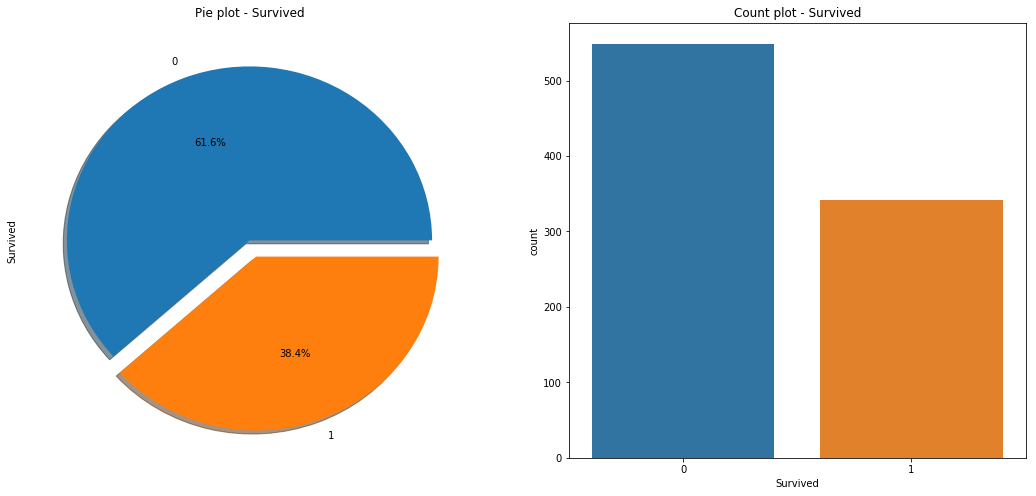

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(18,8))
# train['Survived'].value_counts() #0(사망자수) : 549, 1(생존자) : 342
# value_counts : 특정 컬럼의 값을 기준으로 셀 수 있음

# [원 그래프]
train['Survived'].value_counts().plot.pie(ax=ax[0],autopct='%.1f%%',explode=[0,0.1],shadow=True)
# autopct : 사망자 수, 생존자 수로 두개를 나누어서 %로 출력해주는 속성(곁따옴표 뒤에는 %를 2개 써야한다!)
# ax=ax[0] : ax의 0번째 칸에 넣어라~ 라는 뜻, 원 그래프가 왼쪽에 가게 됨

ax[0].set_title('Pie plot - Survived') #왼쪽 원형 그래프에 타이틀 넣기


# [막대 그래프]
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Count plot - Survived') # 오른쪽 막대 그래프에 타이틀 넣기

plt.show()

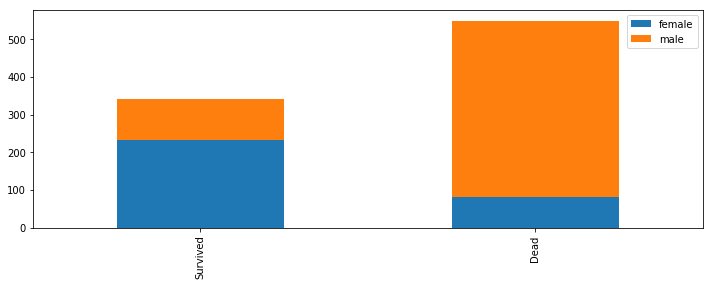

In [514]:
def survived_bar_chart(feature): # feature에 따른 생존 여부를 시각화하는 함수
    # feature가 sex라면 따른 생존여부를 시각화
    # 각각의 feature를 시각화해서 어떤 컬럼이 생존에 영향을 많이 주었는지 확인해보자!
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    
    # 시각화 하기
#   print(type(dead)) # 형식 : 시리즈
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(12,4)) # 선 그래프 생성
#     print(df)
# stacked : 누적옵션 , figsize : 그래프 크기 지정
    
#     print(survived)
#     print("="*50)
#     print(dead)

survived_bar_chart("Sex")

In [515]:
# train[train['Survived']==1]['Sex'].value_counts() # 생존자안에서 ['Sex']에 해당하는 사람 다시 추출!
# train['Survived']==1 로 생존자만 뽑고, 다시 대괄호로 묶어 불린 추출

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


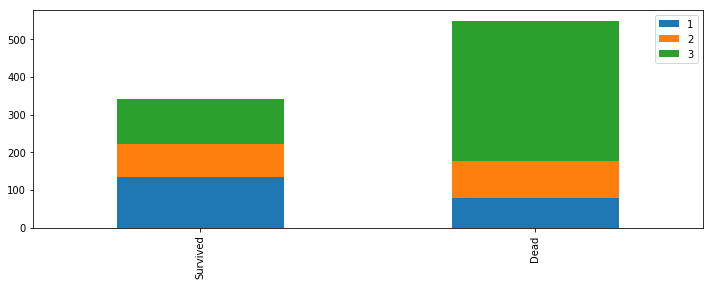

In [516]:
survived_bar_chart("Pclass")
# -> 위에 값 하나만 지정해주면 어떤 값이든 그래프로 표현이 용이하다
# 카테고리로 구성, 순서가 있음
# groupby, pivot을 이용하여 연산 수행

# [문제] pclass 별 생존율
# train[['Pclass','Survived']]

# -> 등급에 따른 survived 값을 구하려면?
train[['Pclass','Survived']].groupby('Pclass').count()
# pclass 별로 Survived 값들의 총 합을 출력


# Pclass 별로 생존자 수
train[['Pclass','Survived']].groupby('Pclass').sum()


# crosstab을 이용한 등실 별 생존자 수
pd.crosstab(train['Pclass'],train['Survived'])
pd.crosstab(train['Pclass'],train['Survived'],margins=True)

# Pclass 별로 생존율
train[['Pclass','Survived']].groupby("Pclass").mean()

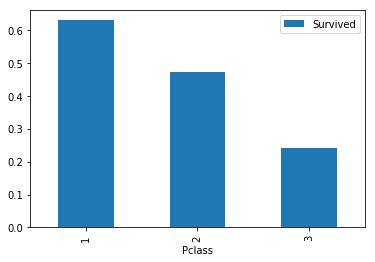

In [517]:
# 등급 별 생존률을 시각화
train[['Pclass','Survived']].groupby("Pclass").mean().plot.bar()
# -> [결론] 모델 만들 때 등급 정보는 매우 중요하게 사용됨

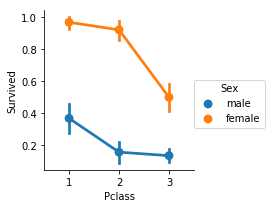

In [518]:
# Sex, Pclass 두 개에 따라 생존의 변화
sns.factorplot('Pclass','Survived',data=train,hue='Sex',size=3)

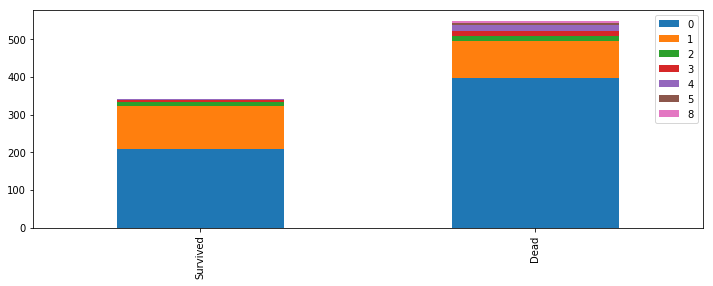

In [519]:
survived_bar_chart('SibSp') # 형제 자매와 배우자의 수
# 0 : 나 혼자 탄 거

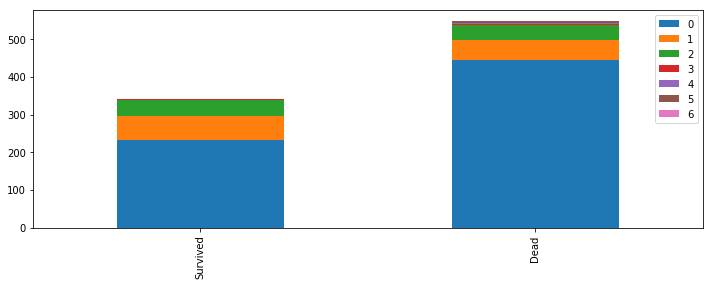

In [520]:
survived_bar_chart('Parch') # 부모와 아이들의 수

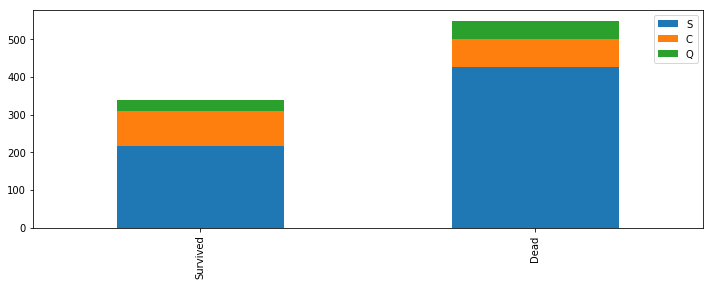

In [521]:
survived_bar_chart('Embarked') # 호실

C:\Users\B-8\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


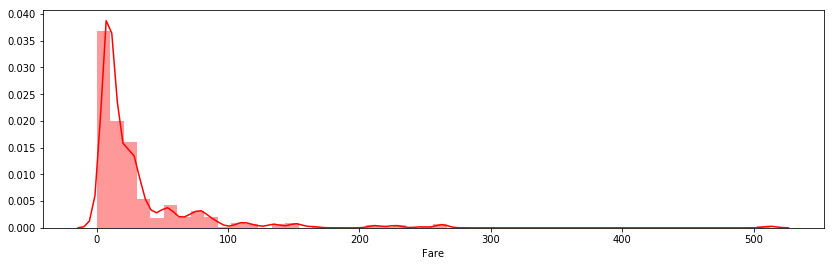

In [522]:
# survived_bar_chart('Fare')
# Fare은 연속 데이터이므로 ... 막대 바 그래프로 그리면 매우 곤란함
# 연속 데이터는 '히스토그램'으로 그리는 게 무난함

fig,ax=plt.subplots(1,1,figsize=(14,4))
sns.distplot(train['Fare'],ax=ax,color='r')

In [523]:
# Cabin은 NaN이 많으므로 모델에 포함할것인지/비포함할것인지 각자 판단
train['Cabin'].isnull().sum() # Cabin에 있는 NaN의 개수
train['Cabin'].isnull().sum()/train.shape[0] # 약 77%가 NaN -> 모델링에서 제외

0.7710437710437711

In [524]:
train['Ticket'].value_counts() # 각 종류별로 몇개인지 출력
# -> Ticket은 NaN이 없음, Ticket 컬럼의 값에 대한 특성 공학은 앞으로는 계속 고민 필요!(관련이 있는지 없는지)

347082                7
CA. 2343              7
1601                  7
3101295               6
347088                6
CA 2144               6
S.O.C. 14879          5
382652                5
19950                 4
2666                  4
LINE                  4
349909                4
113781                4
W./C. 6608            4
347077                4
4133                  4
113760                4
17421                 4
PC 17757              4
24160                 3
29106                 3
PC 17572              3
SC/Paris 2123         3
F.C.C. 13529          3
C.A. 31921            3
35273                 3
C.A. 34651            3
PC 17760              3
110413                3
PC 17755              3
                     ..
S.O.P. 1166           1
3101281               1
236852                1
323951                1
STON/O 2. 3101289     1
110564                1
2667                  1
28424                 1
350029                1
SC/AH 29037           1
PC 17600        

In [525]:
train_test_data=[train,test]
# -> dataset에 Title 컬럼을 추가하면, 자동으로 train, test에도 동일하게 추가된다
# print(train_test_data)

# [문제] dataset['Name']에서 Mr 또는 Mrs만 추출

# [방법 1] extract 함수 : 이 부분과 매치되는 것만 추출해라
for dataset in train_test_data:
    dataset["Title"]=dataset['Name'].str.extract(' ([A-Za-z]+)') # 띄어쓰기 조심!
    print(dataset['Title'])
# print(train['Title'])
# print(test['Title'])


# [방법 2]
train_test_data=[train,test]
# import re
# p=re.compile('[a-z]+ .')
# for dataset in train_test_data:
#     for names in dataset['Name'].str.split(","):
#         print(names[1].split(" ")[1])


# df["column_name"].str.extract('(\d)').astype(int)
# 주어진 문자열에서 숫자문자를 추출한 후 정수타입으로 변환

0             Mr
1            Mrs
2           Miss
3            Mrs
4             Mr
5             Mr
6             Mr
7         Master
8            Mrs
9            Mrs
10          Miss
11          Miss
12            Mr
13            Mr
14          Miss
15           Mrs
16        Master
17            Mr
18        Planke
19           Mrs
20            Mr
21            Mr
22          Miss
23            Mr
24          Miss
25           Mrs
26            Mr
27            Mr
28          Miss
29            Mr
         ...    
861           Mr
862          Mrs
863         Miss
864           Mr
865          Mrs
866            y
867           Mr
868    Melkebeke
869       Master
870           Mr
871          Mrs
872           Mr
873     Cruyssen
874          Mrs
875         Miss
876           Mr
877           Mr
878           Mr
879          Mrs
880          Mrs
881           Mr
882         Miss
883           Mr
884           Mr
885          Mrs
886          Rev
887         Miss
888         Mi

In [526]:
# 정규표현식 match, search 함수 예시
# ex) do*g    => dog, dg, doooog
#     do+g    => dog,doog...
#     do(2)g  => doog
#     do(2,3)g=> doog, dooog
#     ? == {0,1}
#     do?g  # o는 있어도 없어도 됨
    
# import re
# p=re.compile('[a-z]+')
# print(p.match('test'))
# print(p.match('te3st'))
# print(p.match('1te3st'))
# print(p.search('te3st'))
# print(p.search('1te3st'))

In [527]:
# train['Title'].value_counts()
test['Title'].value_counts()
title_mapping={"Mr":0, "Miss":1, "Mrs":2,
    "Master":3,"y":3,"Billiard":3,"Col":3,"Jonkheer":3,
    "Rev":3,"Palmquist":3,"Messemaeker":3,"Capt":3, "Sir":3,
    "Ms":3,"Khalil":3,"Brito":3,"Planke":3,"Dr":3,"Carlo":3}

#train['Title'].value_counts()

for dataset in train_test_data:
    dataset['Title']=dataset["Title"].map(title_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [528]:
# train['Title'].replace(['Ms','Sir'],['Miss','Mr'],inplace=True)
# -> Ms, Sir을 Mrs, Mr로 바꾸겠다

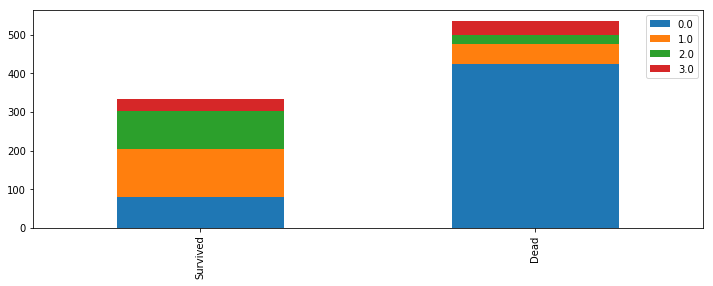

In [529]:
survived_bar_chart("Title")

In [530]:
# train.drop('Name',axis=1,inplace=True) # name 컬럼 제거(필요없으니!)
# train
# drop은 내부적으로 갱신안됨, inplace 속성을 이용하여 원래 데이터에도 적용되게 할 것!

# test.drop('Name',axis=1,inplace=True) # 이미 없애서 error(inplace 쓸려면 값이 반드시 있어야 함)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [531]:
# Male은 0으로, Female은 1로 바꿔보기
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2.0


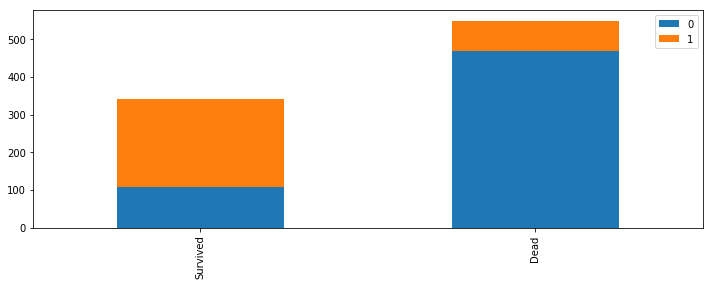

In [532]:
survived_bar_chart('Sex')

In [533]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [534]:
# train.groupby("Title")["Age"].median() # 각 나이의 중앙값

# fillna 시 특정 값으로 일괄 변환할 때는 Transform함수를 적용함
train['Age'].fillna(train.groupby("Title")["Age"].transform('median'),inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform('median'),inplace=True)

# -> NaN에 대해서 이 값을 채워라

In [535]:
train['Age']
test['Age']

0      34.50
1      47.00
2      62.00
3      27.00
4      22.00
5      14.00
6      30.00
7      26.00
8      18.00
9      21.00
10     28.00
11     46.00
12     23.00
13     63.00
14     47.00
15     24.00
16     35.00
17     21.00
18     27.00
19     45.00
20     55.00
21      9.00
22     36.50
23     21.00
24     48.00
25     50.00
26     22.00
27     22.50
28     41.00
29     28.00
       ...  
388    21.00
389     6.00
390    23.00
391    51.00
392    13.00
393    47.00
394    29.00
395    18.00
396    24.00
397    48.00
398    22.00
399    31.00
400    30.00
401    38.00
402    22.00
403    17.00
404    43.00
405    20.00
406    23.00
407    50.00
408    22.00
409     3.00
410    22.00
411    37.00
412    28.00
413    28.00
414    39.00
415    38.50
416    28.00
417    13.75
Name: Age, Length: 418, dtype: float64

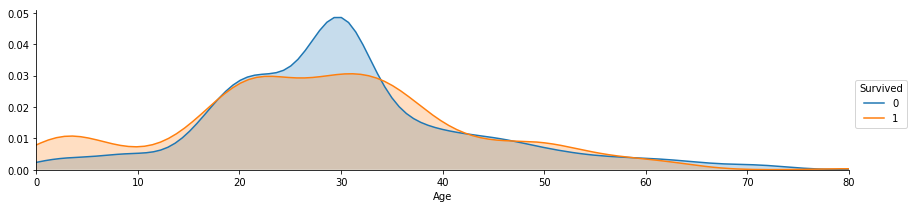

In [536]:
# train 시각화 하기
facet=sns.FacetGrid(train,hue="Survived",aspect=4) # aspect :  넓이 조정
facet.map(sns.kdeplot,'Age',shade=True) # facet에 옵션주기
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend() # 범례 추가(파란색:사망, 주황색:생존)

TypeError: 'float' object is not callable

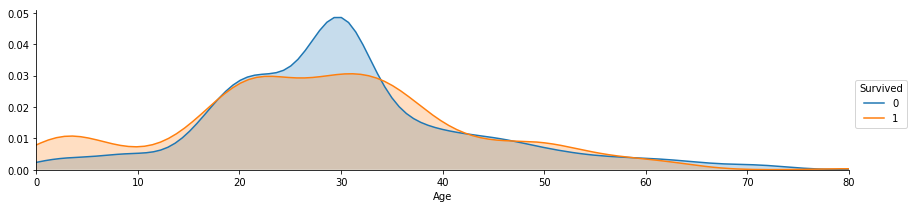

In [537]:
# 구간 바꾸어 크게 보기

facet=sns.FacetGrid(train,hue="Survived",aspect=4) # aspect :  넓이 조정
facet.map(sns.kdeplot,'Age',shade=True) # facet에 옵션주기
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20) # 0살부터 20살까지 -> 생존 많음

In [ ]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4) # aspect :  넓이 조정
facet.map(sns.kdeplot,'Age',shade=True) # facet에 옵션주기
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40) # 30살부터 40살까지 -> 사망 많음

In [538]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [539]:
# binning : 구간 나누기
# child:0, young:1, adult:2, mid-age:3, senior:4
# age 컬럼도 연속형 변수라 따로 따로 출력됨 -> 나이대를 구간별로 나누어 생존했는지 안 했는지를 확인!

for dataset in train_test_data:
    dataset.loc[dataset['Age']<13,'Age']=0
    #   -> 나이가 13세 미만인 age 컬럼의 데이터를 추출한 것임
    dataset.loc[(dataset['Age']>=13) & (dataset['Age']<19),'Age']=1,
    dataset.loc[(dataset['Age']>=19)& (dataset['Age']<36),'Age']=2,
    dataset.loc[(dataset['Age']>=36) & (dataset['Age']<61),'Age']=3,
    dataset.loc[(dataset['Age']>=61),'Age']=4
#     print(dataset.loc[dataset['Age']<13,'Age'])
#     print(dataset['Age']<13]) # 13살보다 작은 것으로 분류하겠다


In [540]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,C,2.0


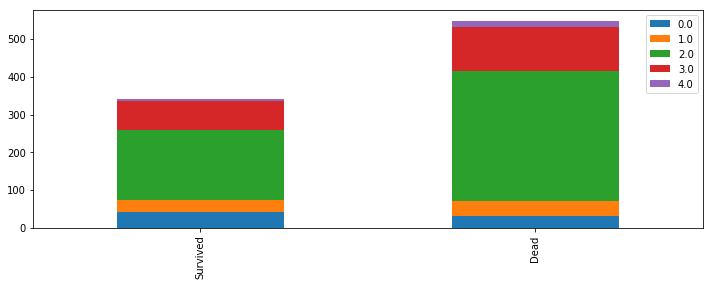

In [541]:
survived_bar_chart('Age')

In [542]:
train['Embarked']
# 선실 등급별(1,2,3) 항구의 합(S,C,Q)
# -> 어디에서 1등급, 2등급, 3등급 선실을 많이 이용했는지 알수 있음

Pclass1=train[train['Pclass']==1]['Embarked'].value_counts() # 1등급 실의 항구의 합
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts() # 2등급 실의 항구의 합
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts() # 3등급 실의 항구의 합
print(Pclass1)
print(Pclass2)
print(Pclass3)

S    127
C     85
Q      2
Name: Embarked, dtype: int64
S    164
C     17
Q      3
Name: Embarked, dtype: int64
S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [543]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


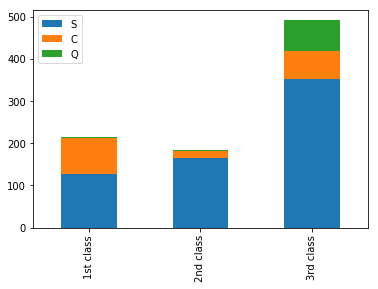

In [544]:
df.plot(kind='bar',stacked=True)

In [545]:
for dataset in train_test_data:
    dataset['Embarked'].fillna('S')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,C,2.0


In [546]:
# dataset['Embarked']을 참조하여 S-> 0, C->1, Q->2로 일괄 변환(map 함수 적용)
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset["Embarked"].map(embarked_mapping)

In [547]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            890 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
Title          870 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB


TypeError: 'float' object is not callable

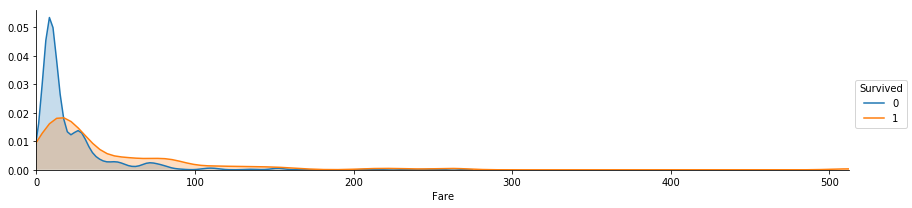

In [548]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4) # aspect :  넓이 조정
facet.map(sns.kdeplot,'Fare',shade=True) # facet에 옵션주기
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
# 0에서 20달러까지를 의미 => 사망이 많음(Fare와 Survived와의 관계가 많다는 것을 의미)


In [549]:
# 구간을 임의적으로 나누었지만, 추후에 내공이 쌓이면... 표준화 하자!
# Sex은 0과 1인데 Fare은 차이가 엄청 남 => 원래는 표준화 적용해야하나 구간 임의 부여
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20,'Fare']=0
    dataset.loc[(dataset['Fare']>20) & (dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30)& (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[(dataset['Fare']>100),'Fare']=3
    
# -> Fare가 0,1,2로 바뀐것을 볼 수 있음!

In [550]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0.0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,NaN,2.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,E46,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,NaN,0.0,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,NaN,0.0,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2.0,NaN,1.0,2.0


In [551]:
# Cabin(방번호)의 NaN 처리
# -> 없애기엔 정보가 중요! 삭제하는 것보다 쓰는 것이 좋음

train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
F33            3
F2             3
D              3
D20            2
D17            2
D36            2
B18            2
B51 B53 B55    2
C93            2
C78            2
E121           2
B58 B60        2
C126           2
B22            2
C125           2
F G73          2
C2             2
D35            2
C52            2
D33            2
B28            2
E8             2
F4             2
B20            2
C68            2
              ..
C85            1
A36            1
B101           1
C82            1
D37            1
C91            1
B79            1
A7             1
E34            1
C62 C64        1
B50            1
B71            1
D7             1
A31            1
E40            1
E77            1
F E69          1
C118           1
E63            1
D28            1
D21            1
D11            1
C103           1
C54            1
B30            1
C101           1
D56            1
B42           

In [552]:
for dataset in train_test_data:
#     dataset['Cabin']
    
    dataset['Cabin']= dataset['Cabin'].str[:1]

In [553]:
dataset['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12       B
13     NaN
14       E
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24       B
25     NaN
26       B
27     NaN
28       A
29     NaN
      ... 
388    NaN
389    NaN
390      B
391      D
392    NaN
393    NaN
394    NaN
395      C
396    NaN
397      B
398    NaN
399    NaN
400      C
401    NaN
402    NaN
403    NaN
404      D
405      D
406    NaN
407      C
408    NaN
409    NaN
410    NaN
411      C
412    NaN
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [554]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts() # Cabin 열의 1등급실만 추출
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts() # Cabin 열의 2등급실만 추출
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts() # Cabin 열의 3등급실만 추출
Pclass1
Pclass2
Pclass3

F    5
G    4
E    3
Name: Cabin, dtype: int64

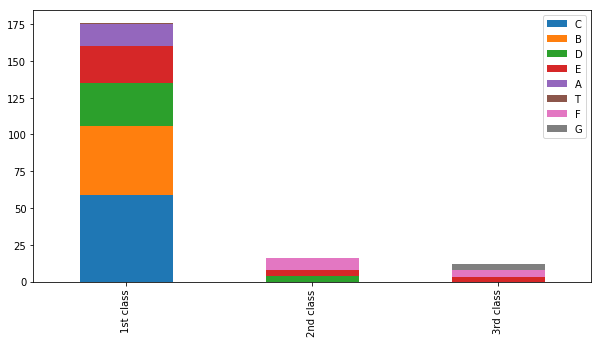

In [555]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind="bar",stacked=True,figsize=(10,5))

In [556]:
cabin_mapping={'A':0,"B":0.4,'C':0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8} # 임의로 지정
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [557]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform('median'),inplace=True)

In [558]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,2.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0.0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,2.0,2.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,1.6,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,2.0,0.0,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,2.0,0.0,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2.0,1.8,1.0,2.0


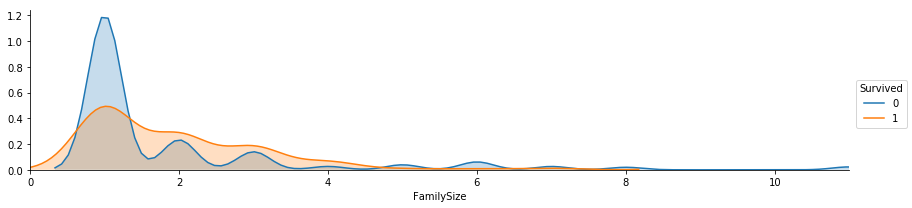

In [559]:
# 가족 수 추가
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

facet=sns.FacetGrid(train,hue="Survived",aspect=4) # aspect :  넓이 조정
facet.map(sns.kdeplot,'FamilySize',shade=True) # facet에 옵션주기
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim=(0.5)

In [560]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0} # 임의로 지정
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [561]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,2.0,0.0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1.0,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0.0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0.0,0.0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,2.0,2.0,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,1.6,0.0,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,2.0,0.0,3.0,1.6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,2.0,0.0,2.0,0.8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2.0,1.8,1.0,2.0,0.4


In [562]:
train=train.drop(['Ticket','SibSp','Parch'],axis=1)
# 'Ticket','SibSp','Parch' 항목 제거

In [563]:
test=test.drop(['Ticket','SibSp','Parch'],axis=1)
# 'Ticket','SibSp','Parch' 항목 제거

In [564]:
train
train_data=train.drop('Survived',axis=1) # Survived 항목 제거

In [565]:
target=train['Survived']
# train_data # Survived 없어짐
# train # Survived 그대로

In [566]:
train_data.shape

(891, 10)

In [567]:
target.shape

(891,)

In [568]:
train_data=train_data.drop('PassengerId',axis=1)

In [569]:
train_data.shape

(891, 9)

In [570]:
# 모든 데이터 수치화
# 여기까지 특성 공학 작업 종료(전처리 종료)
# -------------------------------------------------------------
# 교차 검증(cross validation(k-fold))

# k가 5라고 하면, 전체 데이터가 100개인 경우, 20개씩으로 나누어짐
#                   1   2   3   4   5
# 교차검증의 경우, 20  20  20  20  20
# 1) 1,2,3,4 : 모델링, 5: 테스트 => 정확도 80%
# 2) 1,2,3,5 : 모델링, 4: 테스트 => 정확도 70%
# .....
# 5) 2,3,4,5 : 모델링, 1: 테스트 => 정확도 90%
        
# 전체정확도 : 5번의 검증에 따른 정확도의 평균
    
    
# ------------------------------------------------------------    
# x1 x2 x3  yhat     y(생존여부)
# 실제 테스트 데이터에서는 문제만 준다(결과인 y는 빼고)
# yhat과 y값이 같으면 정확도 높음!


# 트레인 데이터 : 890, 테스트 데이터 : 400
# 89 * 10개 fold -> 교차검증 => 다양한 알고리즘 적용 => 가장 우수한 알고리즘 찾음
# => 테스트 데이터를 우수한 알고리즘에 적용

교차검증 코드 실습

In [571]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [572]:
# 교차 검증을 하기위한 개체 생성(K-fold)
kfold=KFold(n_splits=10,shuffle=True,random_state=0) # 속성값이 10개로 분리
# random_state=0 : 난수 발생

In [573]:
# 1) train.info() # 테스트 데이터의 문제와 답이 있음, -> 모델 작성할 때 사용
# 2) train_data.info() # 테스트 데이터의 문제만 있음
# 3) target # 테스트 데이터의 정답만 있음

In [574]:
train=train.drop('PassengerId',axis=1)

In [575]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
Age           890 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      889 non-null float64
Title         870 non-null float64
FamilySize    891 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 69.7+ KB


In [576]:
# Knn 알고리즘 : K nearest neighbors
# K만큼에 가까운 이웃들을 조사하겠다(= 유유상종)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

clf=KNeighborsClassifier(n_neighbors=3) # 분류기 생성
score=cross_val_score(clf,train_data,target,cv=kfold) # (clf, 문제, 답)
print(score) # 정확도

ValueError: could not convert string to float: 'Behr, Mr. Karl Howell'

In [577]:
# 다 합친다음 평균 구하기
import numpy as np
round(np.mean(score)*100,2) # 2 : 둘째자리까지 출력

NameError: name 'score' is not defined

In [ ]:
clf=GaussianNB()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

In [ ]:
#test_data["Fare"].isnull().value_counts()
#test_data["Title"]

# # Fare와 Title에 대한 NaN값을 중앙값으로 변환하기
test_data["Fare"].fillna(test_data["Fare"].median(),inplace=True)
test_data["Title"].fillna(test_data["Title"].median(),inplace=True)
# test_data[test_data["Title"].isnull()]
# test_data.info()

In [ ]:
# 지금까지는 나이브 베이즈 분류기가 가장 성능이 좋았음, 그래서 일단 이걸로 제출
# clf=GaussianNB()
# clf.fit(train_data,target)
# fit : 주어진 데이터에 대해 잘 설명할 수 있는 모델을 만든다(= 모델을 만드는 함수)
# train_data와 target을 기반으로 모델 제작

test_data=test.drop("PassengerId",axis=1)
# prediction=clf.predict(test_data)
# test_data.info()
# print(prediction)
test_data

In [ ]:
# 지금까지는 나이브 베이즈 분류기가 가장 성능이 좋았음, 그래서 일단 이걸로 제출
clf=GaussianNB()
clf.fit(train_data,target)
# fit : 주어진 데이터에 대해 잘 설명할 수 있는 모델을 만든다(= 모델을 만드는 함수)
# train_data와 target을 기반으로 모델 제작

prediction=clf.predict(test_data)
test_data.info()
print(prediction)